In [17]:
!pip install funcx==0.3.6 -q
!pip install parsl -q
!pip install pyflox -q
!pip install tensorflow==1.14.0 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
from flox.flox import federated_learning
from flox.utils import get_test_data
import tensorflow as tf

In [101]:
end_dict = {'michael1' : '47f8b6b5-5282-4a03-92ae-9fd06c11795f'}
            #'michael2' : 'ac152fee-a8db-43bf-bdd5-bf58a8bfe502'}
            #'michael3' : '1f4eec5c-3615-41c2-8cd6-c14f64207833',
            #'michael4' : '4323ef53-0ca7-4c8c-8f23-90313865d015',
            #'michael5' : 'f9b4f098-8487-4930-9453-c4d59b14bf64',
            #'michael6' : 'a479d0e6-77fb-4f49-9a3b-768dba402078',
            #'michael7' : '498a3287-9c70-4de6-9935-1aadafa3d8be', 
            #'michael8' : '1d04947b-92be-4d07-8a7d-51d9c6091cd2',
            #'michael9' : '5a89cd31-624e-4bb3-b7be-c9751d103243',
            #'michael10' : '15119da0-f73c-4a65-8783-5f1dcc0d38ce'}

endpoint_ids = list(end_dict.values())
endpoint_names = list(end_dict.keys())

endpoint_ids, endpoint_names

resultsEpochs = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsLoops = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsSampleSize = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

finalTimes = []

In [ ]:
#x_test, y_test = get_test_data(keras_dataset='fashion_mnist', num_samples= 30000)

In [102]:
#This is the endpoint runner creator that changes values.
from tensorflow.keras.utils import to_categorical as tc
import pandas as pd

(x,y) , (xt, yt) = tf.keras.datasets.fashion_mnist.load_data()
x = x.reshape(60000, 28, 28, 1)
xt = xt.reshape(10000, 28, 28, 1)
y = tc(y)
yt = tc(yt)

In [103]:

input_shape = (28, 28, 1)
num_classes = 10
global_model = tf.keras.Sequential(
            [
                tf.keras.Input(shape=input_shape),
                tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
                tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dropout(0.5),
                tf.keras.layers.Dense(num_classes, activation="softmax"),
            ]
            )
global_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [104]:
import time
start = time.time()

#
central = global_model.fit(x, y, epochs =10, batch_size = 1000)
#

end = time.time()
finalTimes.append(end - start)



Epoch 1/10
60000/60000 [==============================] - 48s 807us/sample - loss: 5.3776 - acc: 0.5598
Epoch 2/10
60000/60000 [==============================] - 41s 690us/sample - loss: 0.7857 - acc: 0.7328
Epoch 3/10
60000/60000 [==============================] - 47s 779us/sample - loss: 0.6444 - acc: 0.7717
Epoch 4/10
60000/60000 [==============================] - 41s 689us/sample - loss: 0.5782 - acc: 0.7904
Epoch 5/10
60000/60000 [==============================] - 44s 732us/sample - loss: 0.5414 - acc: 0.8049
Epoch 6/10
60000/60000 [==============================] - 44s 738us/sample - loss: 0.5167 - acc: 0.8130
Epoch 7/10
60000/60000 [==============================] - 42s 699us/sample - loss: 0.4864 - acc: 0.8232
Epoch 8/10
60000/60000 [==============================] - 47s 786us/sample - loss: 0.4684 - acc: 0.8307
Epoch 9/10
60000/60000 [==============================] - 42s 692us/sample - loss: 0.4557 - acc: 0.8356
Epoch 10/10
60000/60000 [==============================] - 47s 7

In [105]:
ccl = central.history.get('loss')
cca = central.history.get('acc')
centralm = []
centralm.append(ccl[9])
centralm.append(cca[9])
print(centralm)

[0.4383687903483709, 0.8409333]


In [ ]:
import time
start = time.time()
"the code you want to test stays here"


input_shape = (28, 28, 1)
num_classes = 10

global_model = tf.keras.Sequential(
            [
                tf.keras.Input(shape=input_shape),
                tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
                tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dropout(0.5),
                tf.keras.layers.Dense(num_classes, activation="softmax"),
            ]
            )
global_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

x1 = federated_learning(global_model = global_model,
                        endpoint_ids = endpoint_ids,
                        loops = 10,
                        epochs = 10,
                        keras_dataset = "fashion_mnist",
                        num_samples = 1000,
                        preprocess=True,
                        x_test=xt,
                        y_test=yt,
                        input_shape=(32, 28, 28, 1))

central = x1.evaluate(x,y)

end = time.time()
finalTimes.append(end - start)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Please paste the following URL in a browser:
https://auth.globus.org/v2/oauth2/authorize?client_id=4cf29807-cf21-49ec-9443-ff9a3fb9f81c&redirect_uri=https%3A%2F%2Fauth.globus.org%2Fv2%2Fweb%2Fauth-code&scope=https%3A%2F%2Fauth.globus.org%2Fscopes%2Ffacd7ccc-c5f4-42aa-916b-a0e270e2c2a9%2Fall+urn%3Aglobus%3Aauth%3Ascope%3Asearch.api.globus.org%3Aall+openid&state=_default&response_type=code&code_challenge=hzKf5LuJ6wgRuYe0IkspyZGciTWx5a2GkIwyZfn72Gw&code_challenge_method=S256&access_type=offline&prefill_named_grant=FuncX+SDK+Login
Please Paste your Auth Code Below: 


AuthFailure: ignored

In [106]:
end_dict = {'michael1' : '47f8b6b5-5282-4a03-92ae-9fd06c11795f',
            #'michael2' : '9647b50a-c0fd-47f8-b4b2-61f807901c89'}
            'michael3' : '47f8b6b5-5282-4a03-92ae-9fd06c11795f'}
            #'michael4' : 'cf583249-0b57-47da-b130-d593e620f006',
            #'michael5' : 'a2a19c6d-57e8-479e-8afd-f66629985eaa',
            #'michael6' : '20a0bb21-6b56-4405-9346-dde8ebf7a8cf',
            #'michael7' : 'd6c23bda-93a2-471b-b112-d98a190ccabe', 
            #'michael8' : 'd2369222-bd78-4b9e-851f-e97e94d18d69',
            #'michael9' : '40fa4c26-b8f9-4398-a924-894c297b5045',
            #'michael10' : '38d7dbf4-d763-48bd-ab05-563af2c94ce3'}

endpoint_ids = list(end_dict.values())
endpoint_names = list(end_dict.keys())

endpoint_ids, endpoint_names

(['47f8b6b5-5282-4a03-92ae-9fd06c11795f',
  '47f8b6b5-5282-4a03-92ae-9fd06c11795f'],
 ['michael1', 'michael3'])

In [107]:
import time
start = time.time()

input_shape = (28, 28, 1)
num_classes = 10

global_model = tf.keras.Sequential(
            [
                tf.keras.Input(shape=input_shape),
                tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
                tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dropout(0.5),
                tf.keras.layers.Dense(num_classes, activation="softmax"),
            ]
            )
global_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

x2 = federated_learning(global_model = global_model,
                        endpoint_ids = endpoint_ids,
                        loops = 10,
                        epochs = 5,
                        keras_dataset = "fashion_mnist",
                        num_samples = 500,
                        preprocess=True,
                        x_test=xt,
                        y_test=yt,
                        input_shape=(32, 28, 28, 1))

endpoints2 = x2.evaluate(x,y)

end = time.time()
finalTimes.append(end - start)

Epoch 0, Trained Federated Model
Test loss: 61.19854321594238
Test accuracy: 0.6993
Epoch 1, Trained Federated Model
Test loss: 90.75931610107422
Test accuracy: 0.7016
Epoch 2, Trained Federated Model
Test loss: 65.88203866882324
Test accuracy: 0.7588
Epoch 3, Trained Federated Model
Test loss: 71.65915126342773
Test accuracy: 0.7633
Epoch 4, Trained Federated Model
Test loss: 61.73803777008057
Test accuracy: 0.79
Epoch 5, Trained Federated Model
Test loss: 64.02454208374023
Test accuracy: 0.8052
Epoch 6, Trained Federated Model
Test loss: 60.8910910118103
Test accuracy: 0.8013
Epoch 7, Trained Federated Model
Test loss: 52.87663187945411
Test accuracy: 0.8186
Epoch 8, Trained Federated Model
Test loss: 62.36800317153931
Test accuracy: 0.8229
Epoch 9, Trained Federated Model
Test loss: 60.97550389556885
Test accuracy: 0.8313
60000/60000 [==============================] - 23s 376us/sample - loss: 56.5691 - acc: 0.8425


In [108]:
end_dict = {'michael1' : '47f8b6b5-5282-4a03-92ae-9fd06c11795f',
            'michael2' : '9647b50a-c0fd-47f8-b4b2-61f807901c89',
            'michael3' : '47f8b6b5-5282-4a03-92ae-9fd06c11795f',
            'michael4' : '9647b50a-c0fd-47f8-b4b2-61f807901c89',
            'michael5' : '9647b50a-c0fd-47f8-b4b2-61f807901c89'}
            #'michael6' : '20a0bb21-6b56-4405-9346-dde8ebf7a8cf',
            #'michael7' : 'd6c23bda-93a2-471b-b112-d98a190ccabe', 
            #'michael8' : 'd2369222-bd78-4b9e-851f-e97e94d18d69',
            #'michael9' : '40fa4c26-b8f9-4398-a924-894c297b5045',
            #'michael10' : '38d7dbf4-d763-48bd-ab05-563af2c94ce3'}

endpoint_ids = list(end_dict.values())
endpoint_names = list(end_dict.keys())

endpoint_ids, endpoint_names

(['47f8b6b5-5282-4a03-92ae-9fd06c11795f',
  '9647b50a-c0fd-47f8-b4b2-61f807901c89',
  '47f8b6b5-5282-4a03-92ae-9fd06c11795f',
  '9647b50a-c0fd-47f8-b4b2-61f807901c89',
  '9647b50a-c0fd-47f8-b4b2-61f807901c89'],
 ['michael1', 'michael2', 'michael3', 'michael4', 'michael5'])

In [109]:
import time
start = time.time()

input_shape = (28, 28, 1)
num_classes = 10

global_model = tf.keras.Sequential(
            [
                tf.keras.Input(shape=input_shape),
                tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
                tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dropout(0.5),
                tf.keras.layers.Dense(num_classes, activation="softmax"),
            ]
            )
global_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

x5 = federated_learning(global_model = global_model,
                        endpoint_ids = endpoint_ids,
                        loops = 10,
                        epochs = 2,
                        keras_dataset = "fashion_mnist",
                        num_samples = 200,
                        preprocess=True,
                        x_test=xt,
                        y_test=yt,
                        input_shape=(32, 28, 28, 1))

endpoints5 = x5.evaluate(x,y)

end = time.time()
finalTimes.append(end - start)

Epoch 0, Trained Federated Model
Test loss: 33.240025903320316
Test accuracy: 0.386
Epoch 1, Trained Federated Model
Test loss: 25.07778914794922
Test accuracy: 0.6252
Epoch 2, Trained Federated Model
Test loss: 42.531933883666994
Test accuracy: 0.6544
Epoch 3, Trained Federated Model
Test loss: 66.28201485290528
Test accuracy: 0.6545
Epoch 4, Trained Federated Model
Test loss: 59.33218299560547
Test accuracy: 0.6999
Epoch 5, Trained Federated Model
Test loss: 77.29607632141114
Test accuracy: 0.6891
Epoch 6, Trained Federated Model
Test loss: 71.68334105682374
Test accuracy: 0.7078
Epoch 7, Trained Federated Model
Test loss: 90.23034843444825
Test accuracy: 0.7028
Epoch 8, Trained Federated Model
Test loss: 75.6341036315918
Test accuracy: 0.7182
Epoch 9, Trained Federated Model
Test loss: 77.01593300170899
Test accuracy: 0.7172
60000/60000 [==============================] - 22s 370us/sample - loss: 73.1174 - acc: 0.7307


In [110]:
end_dict = {'michael1' : '47f8b6b5-5282-4a03-92ae-9fd06c11795f',
            'michael2' : '9647b50a-c0fd-47f8-b4b2-61f807901c89',
            'michael3' : '47f8b6b5-5282-4a03-92ae-9fd06c11795f',
            'michael4' : '9647b50a-c0fd-47f8-b4b2-61f807901c89',
            'michael5' : '47f8b6b5-5282-4a03-92ae-9fd06c11795f',
            'michael6' : '9647b50a-c0fd-47f8-b4b2-61f807901c89',
            'michael7' : '47f8b6b5-5282-4a03-92ae-9fd06c11795f', 
            'michael8' : '9647b50a-c0fd-47f8-b4b2-61f807901c89',
            'michael9' : '47f8b6b5-5282-4a03-92ae-9fd06c11795f',
            'michael10' : '9647b50a-c0fd-47f8-b4b2-61f807901c89'}

endpoint_ids = list(end_dict.values())
endpoint_names = list(end_dict.keys())

endpoint_ids, endpoint_names

(['47f8b6b5-5282-4a03-92ae-9fd06c11795f',
  '9647b50a-c0fd-47f8-b4b2-61f807901c89',
  '47f8b6b5-5282-4a03-92ae-9fd06c11795f',
  '9647b50a-c0fd-47f8-b4b2-61f807901c89',
  '47f8b6b5-5282-4a03-92ae-9fd06c11795f',
  '9647b50a-c0fd-47f8-b4b2-61f807901c89',
  '47f8b6b5-5282-4a03-92ae-9fd06c11795f',
  '9647b50a-c0fd-47f8-b4b2-61f807901c89',
  '47f8b6b5-5282-4a03-92ae-9fd06c11795f',
  '9647b50a-c0fd-47f8-b4b2-61f807901c89'],
 ['michael1',
  'michael2',
  'michael3',
  'michael4',
  'michael5',
  'michael6',
  'michael7',
  'michael8',
  'michael9',
  'michael10'])

In [111]:
import time
start = time.time()

input_shape = (28, 28, 1)
num_classes = 10

global_model = tf.keras.Sequential(
            [
                tf.keras.Input(shape=input_shape),
                tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
                tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dropout(0.5),
                tf.keras.layers.Dense(num_classes, activation="softmax"),
            ]
            )
global_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

x10 = federated_learning(global_model = global_model,
                        endpoint_ids = endpoint_ids,
                        loops = 10,
                        epochs = 1,
                        keras_dataset = "fashion_mnist",
                        num_samples = 100,
                        preprocess=True,
                        x_test=xt,
                        y_test=yt,
                        input_shape=(32, 28, 28, 1))

endpoints10 = x10.evaluate(x,y)

end = time.time()
finalTimes.append(end - start)

Epoch 0, Trained Federated Model
Test loss: 27.847289785766602
Test accuracy: 0.2477
Epoch 1, Trained Federated Model
Test loss: 28.826380780029297
Test accuracy: 0.3435
Epoch 2, Trained Federated Model
Test loss: 16.246774459838868
Test accuracy: 0.5073
Epoch 3, Trained Federated Model
Test loss: 22.142477212524415
Test accuracy: 0.5481
Epoch 4, Trained Federated Model
Test loss: 22.18293563079834
Test accuracy: 0.5653
Epoch 5, Trained Federated Model
Test loss: 36.19669410705566
Test accuracy: 0.5598
Epoch 6, Trained Federated Model
Test loss: 33.35795453796387
Test accuracy: 0.5676
Epoch 7, Trained Federated Model
Test loss: 39.34237909240723
Test accuracy: 0.6137
Epoch 8, Trained Federated Model
Test loss: 42.01626755065918
Test accuracy: 0.6235
Epoch 9, Trained Federated Model
Test loss: 48.05116304473877
Test accuracy: 0.6013
60000/60000 [==============================] - 25s 420us/sample - loss: 45.8904 - acc: 0.6097


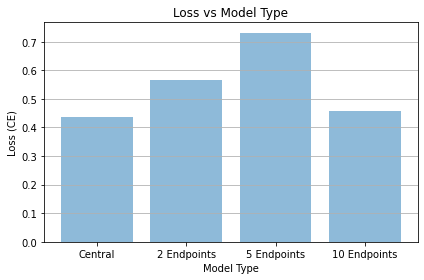

In [112]:
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline



modelss = ['Central', '2 Endpoints', '5 Endpoints', '10 Endpoints']
x_pos = np.arange(len(modelss))
CTEs = [centralm[0], endpoints2[0] / 100, endpoints5[0] / 100, endpoints10[0] / 100]

fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, align='center', alpha=0.5)
ax.set_ylabel('Loss (CE)')
ax.set_xlabel('Model Type')
ax.set_xticks(x_pos)
ax.set_xticklabels(modelss)
ax.set_title('Loss vs Model Type')
ax.yaxis.grid(True)


# Save the figure and show
plt.tight_layout()
plt.savefig('loss.png')
plt.show()

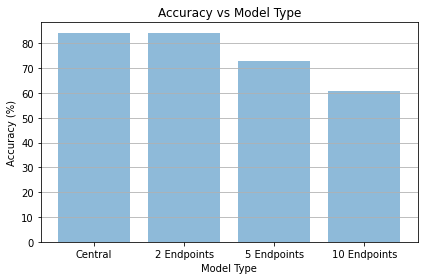

In [113]:
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline



modelss = ['Central', '2 Endpoints', '5 Endpoints', '10 Endpoints']
x_pos = np.arange(len(modelss))
CTEs = [centralm[1] * 100, endpoints2[1] * 100, endpoints5[1] * 100, endpoints10[1] * 100]

fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, align='center', alpha=0.5)
ax.set_ylabel('Accuracy (%)')
ax.set_xlabel('Model Type')
ax.set_xticks(x_pos)
ax.set_xticklabels(modelss)
ax.set_title('Accuracy vs Model Type')
ax.yaxis.grid(True)


# Save the figure and show
plt.tight_layout()
plt.savefig('Accuracy.png')
plt.show()

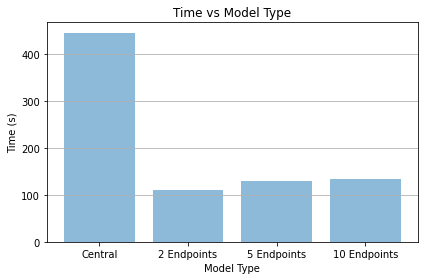

In [114]:
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline



modelss = ['Central', '2 Endpoints', '5 Endpoints', '10 Endpoints']
x_pos = np.arange(len(modelss))
CTEs = finalTimes

fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, align='center', alpha=0.5)
ax.set_ylabel('Time (s)')
ax.set_xlabel('Model Type')
ax.set_xticks(x_pos)
ax.set_xticklabels(modelss)
ax.set_title('Time vs Model Type')
ax.yaxis.grid(True)


# Save the figure and show
plt.tight_layout()
plt.savefig('Time.png')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline



modelss = ['Central', '2 Endpoints', '5 Endpoints', '10 Endpoints']
x_pos = np.arange(len(modelss))
CTEs = [centralm[0], endpoints2[0] / 100, endpoints5[0] / 100, endpoints10[0] / 100]

fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, align='center', alpha=0.5)
ax.set_ylabel('Loss')
ax.set_xlabel('Model Type')
ax.set_xticks(x_pos)
ax.set_xticklabels(modelss)
ax.set_title('Loss vs Model Type')
ax.yaxis.grid(True)


# Save the figure and show
plt.tight_layout()
plt.savefig('loss.png')
plt.show()

In [50]:
def federated_learningEPOCHSCHANGE(y1, eepochs, lloops, ssamples):
    
    reDict = {}
    for i in range(0,y1 + 1):

        input_shape = (28, 28, 1)
        num_classes = 10

        # define the model architecture
        global_model = tf.keras.Sequential(
            [
                tf.keras.Input(shape=input_shape),
                tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
                tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dropout(0.5),
                tf.keras.layers.Dense(num_classes, activation="softmax"),
            ]
            )

        # compile the model
        global_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


        x1 = federated_learning(global_model = global_model,
                                endpoint_ids=endpoint_ids,
                                loops = lloops,
                                epochs = eepochs + i,
                                keras_dataset="fashion_mnist",
                                num_samples=ssamples,
                                preprocess=True,
                                x_test=xt,
                                y_test=yt,
                                input_shape=(32, 28, 28, 1))
        
        print(i)

        newvale = x1.evaluate(x,y)
        
        resultsEpochs["Epochs"].append((eepochs + i) * (10 / eepochs))
        resultsEpochs['Loops'].append(lloops)
        resultsEpochs["Sample Size"].append(ssamples * (10 / eepochs))
        resultsEpochs["Accuracy"].append(newvale[1])
        resultsEpochs["Test Loss"].append(newvale[0])
    return reDict

#federated_learningEPOCHSCHANGE(1)
#federated_learningEPOCHSCHANGE(10)

In [51]:

def federated_learningLOOPSCHANGE(y1, eepochs, lloops, ssamples):
    reDict = {}
    for i in range(0, y1 + 1):

        input_shape = (28, 28, 1)
        num_classes = 10

        # define the model architecture
        global_model = tf.keras.Sequential(
            [
                tf.keras.Input(shape=input_shape),
                tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
                tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dropout(0.5),
                tf.keras.layers.Dense(num_classes, activation="softmax"),
            ]
            )

        # compile the model
        global_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

        x1 = federated_learning(global_model = global_model,
                                endpoint_ids=endpoint_ids,
                                loops = lloops +  i,
                                epochs = eepochs,
                                keras_dataset="fashion_mnist",
                                num_samples = ssamples,
                                preprocess=True,
                                x_test=xt,
                                y_test=yt,
                                input_shape=(32, 28, 28, 1))
        print(i)

        newvale = x1.evaluate(x,y)
        
        resultsLoops["Epochs"].append(10)
        resultsLoops['Loops'].append(i + lloops)
        resultsLoops["Sample Size"].append(ssamples * (10 / eepochs))
        resultsLoops["Accuracy"].append(newvale[1])
        resultsLoops["Test Loss"].append(newvale[0])
    
    return reDict
#federated_learningLOOPSCHANGE(10)
#federated_learningLOOPSCHANGE(10)

In [52]:
def federated_learningSAMPLESCHANGE(y1, eepochs, lloops, ssamples):
    reDict = {}
    for i in range(0,y1 + 1):
        input_shape = (28, 28, 1)
        num_classes = 10

        # define the model architecture
        global_model = tf.keras.Sequential(
            [
                tf.keras.Input(shape=input_shape),
                tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
                tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dropout(0.5),
                tf.keras.layers.Dense(num_classes, activation="softmax"),
            ]
            )

        # compile the model
        global_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

        x1 = federated_learning(global_model = global_model,
                                endpoint_ids=endpoint_ids,
                                loops = lloops,
                                epochs= eepochs,
                                keras_dataset="fashion_mnist",
                                num_samples= ssamples + (i * 100),
                                preprocess=True,
                                x_test=xt,
                                y_test=yt,
                                input_shape=(32, 28, 28, 1))
        print(i)
        
        newvale = x1.evaluate(x,y)
        
        resultsSampleSize["Epochs"].append(10)
        resultsSampleSize['Loops'].append(lloops)
        resultsSampleSize["Sample Size"].append((ssamples + (100 * i)) * (10 / eepochs))
        resultsSampleSize["Accuracy"].append(newvale[1])
        resultsSampleSize["Test Loss"].append(newvale[0])
    return reDict
#federated_learningSAMPLESCHANGE(10)
#federated_learningSAMPLESCHANGE(10)


In [ ]:
""" 
ENDPOINT 1
"""

from google.colab import drive
from google.colab import files
import os

#---------------------------------#

end_dict = {'michael1' : 'ccc1d02c-f352-44da-8b6c-3e4a5ea53a4c'}
            #'michael2' : 'ac152fee-a8db-43bf-bdd5-bf58a8bfe502'}
            #'michael3' : '1f4eec5c-3615-41c2-8cd6-c14f64207833',
            #'michael4' : '4323ef53-0ca7-4c8c-8f23-90313865d015',
            #'michael5' : 'f9b4f098-8487-4930-9453-c4d59b14bf64',
            #'michael6' : 'a479d0e6-77fb-4f49-9a3b-768dba402078',
            #'michael7' : '498a3287-9c70-4de6-9935-1aadafa3d8be', 
            #'michael8' : '1d04947b-92be-4d07-8a7d-51d9c6091cd2',
            #'michael9' : '5a89cd31-624e-4bb3-b7be-c9751d103243',
            #'michael10' : '15119da0-f73c-4a65-8783-5f1dcc0d38ce'}

endpoint_ids = list(end_dict.values())
endpoint_names = list(end_dict.keys())

endpoint_ids, endpoint_names

#---------------------------------#


resultsEpochs = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsLoops = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsSampleSize = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

#---------------------------------#

for i in range(5):
  federated_learningEPOCHSCHANGE(10, 10, 2, 1000)
  federated_learningLOOPSCHANGE(10, 10, 2, 1000)
  federated_learningSAMPLESCHANGE(10, 10, 2, 1000)

#---------------------------------#

dfe = pd.DataFrame(resultsEpochs)
dfl = pd.DataFrame(resultsLoops)
dfss = pd.DataFrame(resultsSampleSize)

#---------------------------------#

dfe.to_csv('DataOnEpochs.csv', encoding = 'utf-8-sig') 
# files.download('DataOnEpochs.csv')

dfe.to_csv('DataOnLoops.csv', encoding = 'utf-8-sig') 
# files.download('DataOnLoops.csv')

dfe.to_csv('DataOnSampleSize.csv', encoding = 'utf-8-sig') 
# files.download('DataOnSampleSize.csv')

#---------------------------------#

drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI1ENDPOINT/DataOnEpochs.csv'


with open(path, 'w', encoding = 'utf-8-sig') as f1:
  dfe.to_csv(f1)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI1ENDPOINT/DataOnLoops.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f2:
  dfl.to_csv(f2)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI1ENDPOINT/DataOnSampleSize.csv'
 
with open(path, 'w', encoding = 'utf-8-sig') as f3:
  dfss.to_csv(f3)



Epoch 0, Trained Federated Model
Test loss: 61.50995930480957
Test accuracy: 0.7796
Epoch 1, Trained Federated Model
Test loss: 68.53963257988688
Test accuracy: 0.806
0
60000/60000 [==============================] - 20s 335us/sample - loss: 63.7539 - acc: 0.8103
Epoch 0, Trained Federated Model
Test loss: 73.02278363952637
Test accuracy: 0.7754
Epoch 1, Trained Federated Model
Test loss: 61.947865504455564
Test accuracy: 0.8137
1
60000/60000 [==============================] - 20s 334us/sample - loss: 58.9715 - acc: 0.8196
Epoch 0, Trained Federated Model
Test loss: 67.90606830444337
Test accuracy: 0.7737
Epoch 1, Trained Federated Model
Test loss: 68.57153614044189
Test accuracy: 0.8061
2
60000/60000 [==============================] - 20s 329us/sample - loss: 65.8918 - acc: 0.8145
Epoch 0, Trained Federated Model
Test loss: 73.71128030395508
Test accuracy: 0.7627
Epoch 1, Trained Federated Model
Test loss: 63.51476762447357
Test accuracy: 0.8035
3
60000/60000 [=========================

In [ ]:
""" 
ENDPOINT 2
"""

from google.colab import drive
from google.colab import files
import os

#---------------------------------#

end_dict = {'michael1' : '76a0f0c1-20c4-430a-b1db-112149c532d4',
            'michael2' : '0be19381-ab97-406a-a1da-ff5c99638dfa'}
            #'michael3' : '1f4eec5c-3615-41c2-8cd6-c14f64207833',
            #'michael4' : '4323ef53-0ca7-4c8c-8f23-90313865d015',
            #'michael5' : 'f9b4f098-8487-4930-9453-c4d59b14bf64',
            #'michael6' : 'a479d0e6-77fb-4f49-9a3b-768dba402078',
            #'michael7' : '498a3287-9c70-4de6-9935-1aadafa3d8be', 
            #'michael8' : '1d04947b-92be-4d07-8a7d-51d9c6091cd2',
            #'michael9' : '5a89cd31-624e-4bb3-b7be-c9751d103243',
            #'michael10' : '15119da0-f73c-4a65-8783-5f1dcc0d38ce'}

endpoint_ids = list(end_dict.values())
endpoint_names = list(end_dict.keys())

endpoint_ids, endpoint_names

#---------------------------------#


resultsEpochs = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsLoops = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsSampleSize = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

#---------------------------------#

for i in range(4):
  federated_learningEPOCHSCHANGE(5, 5, 2, 500)
  federated_learningLOOPSCHANGE(10, 5, 2, 500)
  federated_learningSAMPLESCHANGE(5, 5, 2, 500)

#---------------------------------#

dfe = pd.DataFrame(resultsEpochs)
dfl = pd.DataFrame(resultsLoops)
dfss = pd.DataFrame(resultsSampleSize)

#---------------------------------#

dfe.to_csv('DataOnEpochs.csv', encoding = 'utf-8-sig') 
# files.download('DataOnEpochs.csv')

dfe.to_csv('DataOnLoops.csv', encoding = 'utf-8-sig') 
# files.download('DataOnLoops.csv')

dfe.to_csv('DataOnSampleSize.csv', encoding = 'utf-8-sig') 
# files.download('DataOnSampleSize.csv')

#---------------------------------#

drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI2ENDPOINTS/DataOnEpochs.csv'


with open(path, 'w', encoding = 'utf-8-sig') as f1:
  dfe.to_csv(f1)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI2ENDPOINTS/DataOnLoops.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f2:
  dfl.to_csv(f2)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI2ENDPOINTS/DataOnSampleSize.csv'
 
with open(path, 'w', encoding = 'utf-8-sig') as f3:
  dfss.to_csv(f3)

Epoch 0, Trained Federated Model
Test loss: 70.03041378173828
Test accuracy: 0.703
Epoch 1, Trained Federated Model
Test loss: 75.75873762512207
Test accuracy: 0.7345
0
60000/60000 [==============================] - 20s 328us/sample - loss: 71.9457 - acc: 0.7466
Epoch 0, Trained Federated Model
Test loss: 86.05647728881836
Test accuracy: 0.6909
Epoch 1, Trained Federated Model
Test loss: 72.24526943664551
Test accuracy: 0.7591
1
60000/60000 [==============================] - 21s 355us/sample - loss: 69.1986 - acc: 0.7646
Epoch 0, Trained Federated Model
Test loss: 74.87241674804687
Test accuracy: 0.7276
Epoch 1, Trained Federated Model
Test loss: 69.95464997253418
Test accuracy: 0.7622
2
60000/60000 [==============================] - 20s 336us/sample - loss: 66.6874 - acc: 0.7718
Epoch 0, Trained Federated Model
Test loss: 64.58117977905273
Test accuracy: 0.7163
Epoch 1, Trained Federated Model
Test loss: 77.33530406799316
Test accuracy: 0.764
3
60000/60000 [===========================

In [ ]:
""" 
ENDPOINT 5
"""

from google.colab import drive
from google.colab import files
import os

#---------------------------------#

end_dict = {'michael1' : '76a0f0c1-20c4-430a-b1db-112149c532d4',
            'michael2' : '0be19381-ab97-406a-a1da-ff5c99638dfa',
            'michael3' : 'a0935e1e-85dc-47d3-883f-7abb2c71f9fc',
            'michael4' : 'cf583249-0b57-47da-b130-d593e620f006',
            'michael5' : 'a2a19c6d-57e8-479e-8afd-f66629985eaa'}
            #'michael6' : 'a479d0e6-77fb-4f49-9a3b-768dba402078',
            #'michael7' : '498a3287-9c70-4de6-9935-1aadafa3d8be', 
            #'michael8' : '1d04947b-92be-4d07-8a7d-51d9c6091cd2',
            #'michael9' : '5a89cd31-624e-4bb3-b7be-c9751d103243',
            #'michael10' : '15119da0-f73c-4a65-8783-5f1dcc0d38ce'}

endpoint_ids = list(end_dict.values())
endpoint_names = list(end_dict.keys())

endpoint_ids, endpoint_names

#---------------------------------#


resultsEpochs = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsLoops = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsSampleSize = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

#---------------------------------#

for i in range(5):
  federated_learningEPOCHSCHANGE(2, 2, 2, 200)
  federated_learningLOOPSCHANGE(10, 2, 2, 200)
  federated_learningSAMPLESCHANGE(2, 2, 2, 200)

#---------------------------------#

dfe = pd.DataFrame(resultsEpochs)
dfl = pd.DataFrame(resultsLoops)
dfss = pd.DataFrame(resultsSampleSize)

#---------------------------------#

dfe.to_csv('DataOnEpochs.csv', encoding = 'utf-8-sig') 
# files.download('DataOnEpochs.csv')

dfe.to_csv('DataOnLoops.csv', encoding = 'utf-8-sig') 
# files.download('DataOnLoops.csv')

dfe.to_csv('DataOnSampleSize.csv', encoding = 'utf-8-sig') 
# files.download('DataOnSampleSize.csv')

#---------------------------------#

drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI5ENDPOINTS/DataOnEpochs.csv'


with open(path, 'w', encoding = 'utf-8-sig') as f1:
  dfe.to_csv(f1)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI5ENDPOINTS/DataOnLoops.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f2:
  dfl.to_csv(f2)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI5ENDPOINTS/DataOnSampleSize.csv'
 
with open(path, 'w', encoding = 'utf-8-sig') as f3:
  dfss.to_csv(f3)

Epoch 0, Trained Federated Model
Test loss: 20.33956288909912
Test accuracy: 0.5134
Epoch 1, Trained Federated Model
Test loss: 32.06585709838867
Test accuracy: 0.6091
0
60000/60000 [==============================] - 19s 311us/sample - loss: 31.0920 - acc: 0.6123
Epoch 0, Trained Federated Model
Test loss: 40.88690098876953
Test accuracy: 0.5174
Epoch 1, Trained Federated Model
Test loss: 48.91539034729004
Test accuracy: 0.6353
1
60000/60000 [==============================] - 19s 317us/sample - loss: 47.3471 - acc: 0.6393
Epoch 0, Trained Federated Model
Test loss: 39.49983248596192
Test accuracy: 0.5276
Epoch 1, Trained Federated Model
Test loss: 87.91454127197265
Test accuracy: 0.596
2
60000/60000 [==============================] - 19s 319us/sample - loss: 84.3492 - acc: 0.6098
Epoch 0, Trained Federated Model
Test loss: 30.5804235748291
Test accuracy: 0.357
Epoch 1, Trained Federated Model
Test loss: 32.15877476806641
Test accuracy: 0.5964
0
60000/60000 [============================

In [53]:
""" 
ENDPOINT 10
"""

from google.colab import drive
from google.colab import files
import os

#---------------------------------#

end_dict = {'michael1' : '47f8b6b5-5282-4a03-92ae-9fd06c11795f',
            'michael2' : '9647b50a-c0fd-47f8-b4b2-61f807901c89',
            'michael3' : '47f8b6b5-5282-4a03-92ae-9fd06c11795f',
            'michael4' : '9647b50a-c0fd-47f8-b4b2-61f807901c89',
            'michael5' : '47f8b6b5-5282-4a03-92ae-9fd06c11795f',
            'michael6' : '9647b50a-c0fd-47f8-b4b2-61f807901c89',
            'michael7' : '47f8b6b5-5282-4a03-92ae-9fd06c11795f', 
            'michael8' : '9647b50a-c0fd-47f8-b4b2-61f807901c89',
            'michael9' : '47f8b6b5-5282-4a03-92ae-9fd06c11795f',
            'michael10' : '9647b50a-c0fd-47f8-b4b2-61f807901c89'}


endpoint_ids = list(end_dict.values())
endpoint_names = list(end_dict.keys())

endpoint_ids, endpoint_names

#---------------------------------#


resultsEpochs = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsLoops = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsSampleSize = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

#---------------------------------#

for i in range(5):
  federated_learningEPOCHSCHANGE(1, 1, 2, 100)
  federated_learningLOOPSCHANGE(10, 1, 2, 100)
  federated_learningSAMPLESCHANGE(1, 1, 2, 100)

#---------------------------------#

dfe = pd.DataFrame(resultsEpochs)
dfl = pd.DataFrame(resultsLoops)
dfss = pd.DataFrame(resultsSampleSize)

#---------------------------------#

dfe.to_csv('DataOnEpochs.csv', encoding = 'utf-8-sig') 
# files.download('DataOnEpochs.csv')

dfe.to_csv('DataOnLoops.csv', encoding = 'utf-8-sig') 
# files.download('DataOnLoops.csv')

dfe.to_csv('DataOnSampleSize.csv', encoding = 'utf-8-sig') 
# files.download('DataOnSampleSize.csv')

#---------------------------------#

drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI10ENDPOINTS/DataOnEpochs.csv'


with open(path, 'w', encoding = 'utf-8-sig') as f1:
  dfe.to_csv(f1)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI10ENDPOINTS/DataOnLoops.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f2:
  dfl.to_csv(f2)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI10ENDPOINTS/DataOnSampleSize.csv'
 
with open(path, 'w', encoding = 'utf-8-sig') as f3:
  dfss.to_csv(f3)

Epoch 0, Trained Federated Model
Test loss: 21.340040393066406
Test accuracy: 0.2198
Epoch 1, Trained Federated Model
Test loss: 15.089628494262696
Test accuracy: 0.4498
0
60000/60000 [==============================] - 20s 337us/sample - loss: 15.1021 - acc: 0.4463
Epoch 0, Trained Federated Model
Test loss: 38.8412952331543
Test accuracy: 0.1792
Epoch 1, Trained Federated Model
Test loss: 15.286153680419922
Test accuracy: 0.4711
1
60000/60000 [==============================] - 20s 339us/sample - loss: 15.1217 - acc: 0.4736
Epoch 0, Trained Federated Model
Test loss: 24.881505429077148
Test accuracy: 0.258
Epoch 1, Trained Federated Model
Test loss: 15.318775927734375
Test accuracy: 0.394
0
60000/60000 [==============================] - 22s 372us/sample - loss: 15.2251 - acc: 0.3914
Epoch 0, Trained Federated Model
Test loss: 15.648557681274415
Test accuracy: 0.1932
Epoch 1, Trained Federated Model
Test loss: 20.62406019744873
Test accuracy: 0.2475
Epoch 2, Trained Federated Model
Test

In [ ]:
"""
dicte = []
dictl = []
dicts = []
dicta = []
dictloss = []
for i in range(1, len(dictepoch) + 1):
  dicte.append(i * 10)
  dictl.append(2)
  dicts.append(10)
  newvale = dictepoch[i*10].evaluate(x,tc(y))
  dicta.append(newvale[1])
  dictloss.append(newvale[0])
results["Epochs"] = dicte
results['Loops'] = dictl
results["Sample Size"] = dicts
results["Accuracy"] = dicta
results["Test Loss"] = dictloss
print(results)
"""

60000/60000 [==============================] - 15s 250us/sample - loss: 113.8178 - acc: 0.7495
{'Epochs': [10, 20, 30, 40, 50], 'Sample Size': [10, 10, 10, 10, 10], 'Loops': [2, 2, 2, 2, 2], 'Accuracy': [0.74946666, 0.74946666, 0.74946666, 0.74946666, 0.74946666], 'Test Loss': [113.81783011398315, 113.81783011398315, 113.81783011398315, 113.81783011398315, 113.81783011398315]}


In [ ]:
newvale = dictepoch[10].evaluate(x,tc(y))
print(newvale[0]) # test loss
print(newvale[1]) # test accuracy

60000/60000 [==============================] - 15s 254us/sample - loss: 113.8178 - acc: 0.7495
113.81783011398315
0.74946666


In [ ]:
from tensorflow.python.ops.gen_array_ops import size
print(resultsEpochs)
print(resultsLoops)
print(resultsSampleSize)

{'Epochs': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'Sample Size': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'Loops': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'Accuracy': [0.35618332, 0.44501665, 0.5367333, 0.65265, 0.62198335, 0.63406664, 0.66251665, 0.63105, 0.688, 0.70128334], 'Test Loss': [51.938803432210285, 139.95357853393554, 110.09572356465658, 79.25210525512695, 112.80562682673137, 136.57362915445964, 92.48152704493205, 131.7415666829427, 115.9602489344279, 101.08439803517659]}
{'Epochs': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'Sample Size': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], 'Loops': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'Accuracy': [0.36946666, 0.47916666, 0.49958333, 0.61871666, 0.6845667, 0.6807333, 0.65168333, 0.6382167, 0.69348335, 0.67235], 'Test Loss': [69.65930403849283, 48.044708020019534, 145.25427676595052, 88.00673359425862, 63.01788702074687, 58.67350805918375, 88.88936299489339, 111.70074462381999, 95.62365055999756, 96.94858215433757]}
{'Epochs': [2, 2,

In [ ]:
from google.colab import drive
from google.colab import files
import os


try:
  drive.mount('/content/drive', force_remount = True)
  path = '/content/drive/My Drive/DataDSI1ENDPOINT/DataOnEpochs.csv'
  dfe = pd.read_csv("/content/drive/My Drive/DataDSI1ENDPOINT/DataOnEpochs.csv")
  dfe2 = pd.DataFrame(resultsEpochs)

except:

  dfe = pd.DataFrame(resultsEpochs)

try:
  drive.mount('/content/drive', force_remount = True)
  path = '/content/drive/My Drive/DataDSI1ENDPOINT/DataOnLoops.csv'  
  dfl = pd.read_csv("/content/drive/My Drive/DataDSI1ENDPOINT/DataOnLoops.csv")
  dfl2 = pd.DataFrame(resultsLoops)

except:

  dfl = pd.DataFrame(resultsLoops)

try:
  drive.mount('/content/drive', force_remount = True)
  path = '/content/drive/My Drive/DataDSI1ENDPOINT/DataOnSampleSize.csv'
  dfss = pd.read_csv("/content/drive/My Drive/DataDSI1ENDPOINT/DataOnSampleSize.csv")  
  dfss2 = pd.DataFrame(resultsSampleSize)

except:
  dfss = pd.DataFrame (resultsSampleSize)

Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive


In [ ]:
def accuracyGather(df, row):
  returnlist = []
  for i in range(0, len(df)):
    for j in range()
  return 

In [57]:
from google.colab import drive
from google.colab import files
import os



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI1ENDPOINT/DataOnEpochs.csv'
dfe1 = pd.read_csv("/content/drive/My Drive/DataDSI1ENDPOINT/DataOnEpochs.csv")

drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI1ENDPOINT/DataOnLoops.csv'
dfl1 = pd.read_csv("/content/drive/My Drive/DataDSI1ENDPOINT/DataOnLoops.csv")

drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI1ENDPOINT/DataOnSampleSize.csv'
dfss1 = pd.read_csv("/content/drive/My Drive/DataDSI1ENDPOINT/DataOnSampleSize.csv")

#-----------------------------------------------------------------------------------#

drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI5ENDPOINTS/DataOnSampleSize.csv'
dfss5 = pd.read_csv("/content/drive/My Drive/DataDSI5ENDPOINTS/DataOnSampleSize.csv")  

drive.mount('/content/drive')
path = '/content/drive/My Drive/DataDSI5ENDPOINTS/DataOnEpochs.csv'
dfe5 = pd.read_csv("/content/drive/My Drive/DataDSI5ENDPOINTS/DataOnEpochs.csv")

drive.mount('/content/drive')
path = '/content/drive/My Drive/DataDSI5ENDPOINTS/DataOnLoops.csv'
dfl5 = pd.read_csv("/content/drive/My Drive/DataDSI5ENDPOINTS/DataOnLoops.csv")

#-----------------------------------------------------------------------------------#

drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI2ENDPOINTS/DataOnSampleSize.csv'
dfss2 = pd.read_csv("/content/drive/My Drive/DataDSI2ENDPOINTS/DataOnSampleSize.csv")  

drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI2ENDPOINTS/DataOnEpochs.csv'
dfe2 = pd.read_csv("/content/drive/My Drive/DataDSI2ENDPOINTS/DataOnEpochs.csv")  

drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI2ENDPOINTS/DataOnLoops.csv'
dfl2 = pd.read_csv("/content/drive/My Drive/DataDSI2ENDPOINTS/DataOnLoops.csv")  


#-----------------------------------------------------------------------------------#

drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI10ENDPOINTS/DataOnSampleSize.csv'
dfss10 = pd.read_csv("/content/drive/My Drive/DataDSI10ENDPOINTS/DataOnSampleSize.csv")  

drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI10ENDPOINTS/DataOnEpochs.csv'
dfe10 = pd.read_csv("/content/drive/My Drive/DataDSI10ENDPOINTS/DataOnEpochs.csv") 

drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI10ENDPOINTS/DataOnLoops.csv'
dfl10 = pd.read_csv("/content/drive/My Drive/DataDSI10ENDPOINTS/DataOnLoops.csv") 







Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive


In [ ]:
drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI2ENDPOINTS/DataOnSampleSize.csv'
dfss2 = pd.read_csv("/content/drive/My Drive/DataDSI2ENDPOINTS/DataOnSampleSize.csv")  

drive.mount('/content/drive')
path = '/content/drive/My Drive/DataDSI2ENDPOINTS/DataOnEpochs.csv'
dfe2 = pd.read_csv("/content/drive/My Drive/DataDSI2ENDPOINTS/DataOnEpochs.csv")

drive.mount('/content/drive')
path = '/content/drive/My Drive/DataDSI2ENDPOINTS/DataOnLoops.csv'
dfl2 = pd.read_csv("/content/drive/My Drive/DataDSI2ENDPOINTS/DataOnLoops.csv")


#df['quantity'] = df['quantity'].apply(lambda x: x*-1)
dfss2['Sample Size'] = dfss2['Sample Size'].apply(lambda x: x * 10)
dfe2['Sample Size'] = dfe2['Sample Size'].apply(lambda x: x * 10)
dfl2['Sample Size'] = dfl2['Sample Size'].apply(lambda x: x * 10)

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
dfe5


,Unnamed: 0,Epochs,Sample Size,Loops,Accuracy,Test Loss
0,0,10.0,1000.0,2,0.612283,31.091977
1,1,15.0,1000.0,2,0.639333,47.347109
2,2,20.0,1000.0,2,0.609800,84.349165
3,3,10.0,1000.0,2,0.561450,35.679168
4,4,15.0,1000.0,2,0.681217,49.686878
5,5,20.0,1000.0,2,0.621183,56.682356
6,6,10.0,1000.0,2,0.637533,18.934485
7,7,15.0,1000.0,2,0.630950,38.700177
8,8,20.0,1000.0,2,0.659183,61.041443
9,9,10.0,1000.0,2,0.600000,37.331263


In [87]:
def epochsAVE(x):

  y = {}
  for i in range(len(x)):
    try:
      y[(x["Epochs"][i])] = (x["Accuracy"][i] + y[(x["Epochs"][i])]) / 2
    except:
      y[(x["Epochs"][i])] = x["Accuracy"][i]
  return(y)


In [95]:
def loopsAVE(x):

  y = {}
  for i in range(len(x)):
    try:
      y[(x["Loops"][i])] = (x["Accuracy"][i] + y[(x["Loops"][i])]) / 2
    except:
      y[(x["Loops"][i])] = x["Accuracy"][i]
  return(y)


In [97]:
def samplesAVE(x):

  y = {}
  for i in range(len(x)):
    try:
      y[(x["Sample Size"][i])] = (x["Accuracy"][i] + y[(x["Sample Size"][i])]) / 2
    except:
      y[(x["Sample Size"][i])] = x["Accuracy"][i]
  return(y)


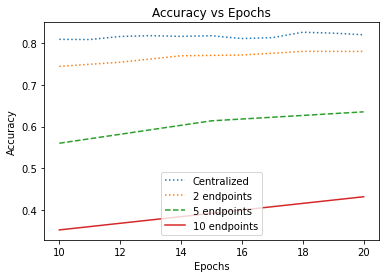

In [99]:
#graphing dfe
import matplotlib.pyplot as plt
import numpy as np
import math
data1 = epochsAVE(dfe1)
data2 = epochsAVE(dfe2)
data5 = epochsAVE(dfe5)
data10 = epochsAVE(dfe10)

x_vals1 = list(data1.keys())
y_vals1 = list(data1.values())

x_vals2 = list(data2.keys())
y_vals2 = list(data2.values())

x_vals5 = list(data5.keys())
y_vals5 = list(data5.values())

x_vals10 = list(data10.keys())
y_vals10 = list(data10.values())

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")

plt.plot(x_vals1, y_vals1, linestyle = ":", label = "Centralized")
plt.plot(x_vals2, y_vals2, linestyle = ":", label = "2 endpoints")
plt.plot(x_vals5, y_vals5, linestyle = "--", label = "5 endpoints")
plt.plot(x_vals10, y_vals10, linestyle = "-", label = "10 endpoints")
plt.legend()

plt.savefig('Epochs.pdf', bbox_inches='tight')

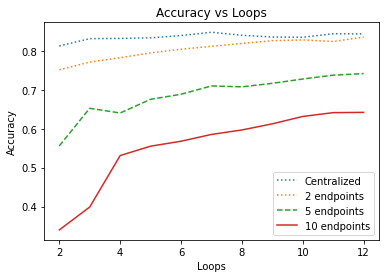

In [116]:
import matplotlib.pyplot as plt
import numpy as np
import math
data1 = loopsAVE(dfl1)
data2 = loopsAVE(dfl2)
data5 = loopsAVE(dfl5)
data10 = loopsAVE(dfl10)

x_vals1 = list(data1.keys())
y_vals1 = list(data1.values())

x_vals2 = list(data2.keys())
y_vals2 = list(data2.values())

x_vals5 = list(data5.keys())
y_vals5 = list(data5.values())

x_vals10 = list(data10.keys())
y_vals10 = list(data10.values())

plt.xlabel("Loops")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Loops")

plt.plot(x_vals1, y_vals1, linestyle = ":", label = "Centralized")
plt.plot(x_vals2, y_vals2, linestyle = ":", label = "2 endpoints")
plt.plot(x_vals5, y_vals5, linestyle = "--", label = "5 endpoints")
plt.plot(x_vals10, y_vals10, linestyle = "-", label = "10 endpoints")
plt.legend()

plt.savefig('Epochs.pdf', bbox_inches='tight')

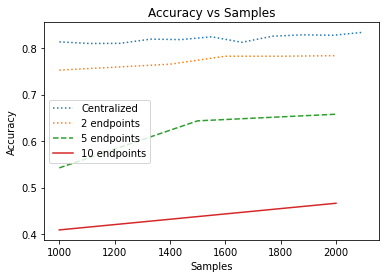

In [115]:
#graphing dfe
import matplotlib.pyplot as plt
import numpy as np
import math
data1 = samplesAVE(dfss1)
data2 = samplesAVE(dfss2)
data5 = samplesAVE(dfss5)
data10 = samplesAVE(dfss10)

x_vals1 = list(data1.keys())
y_vals1 = list(data1.values())

x_vals2 = list(data2.keys())
y_vals2 = list(data2.values())

x_vals5 = list(data5.keys())
y_vals5 = list(data5.values())

x_vals10 = list(data10.keys())
y_vals10 = list(data10.values())

plt.xlabel("Samples")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Samples")

plt.plot(x_vals1, y_vals1, linestyle = ":", label = "Centralized")
plt.plot(x_vals2, y_vals2, linestyle = ":", label = "2 endpoints")
plt.plot(x_vals5, y_vals5, linestyle = "--", label = "5 endpoints")
plt.plot(x_vals10, y_vals10, linestyle = "-", label = "10 endpoints")
plt.legend()

plt.savefig('Epochs.pdf', bbox_inches='tight')

In [ ]:
# converting dataframes to csv files to save them
from google.colab import drive
from google.colab import files
import os




dfe.to_csv('DataOnEpochs.csv', encoding = 'utf-8-sig') 
# files.download('DataOnEpochs.csv')

dfe.to_csv('DataOnLoops.csv', encoding = 'utf-8-sig') 
# files.download('DataOnLoops.csv')

dfe.to_csv('DataOnSampleSize.csv', encoding = 'utf-8-sig') 
# files.download('DataOnSampleSize.csv')


In [ ]:

drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI1ENDPOINT/DataOnEpochs.csv'


with open(path, 'w', encoding = 'utf-8-sig') as f1:
  dfe2.to_csv(f1)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI1ENDPOINT/DataOnLoops.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f2:
  dfl2.to_csv(f2)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI1ENDPOINT/DataOnSampleSize.csv'
 
with open(path, 'w', encoding = 'utf-8-sig') as f3:
  dfss2.to_csv(f3)


Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive


In [ ]:
dfe

,Unnamed: 0,Unnamed: 0.1,Epochs,Sample Size,Loops,Accuracy,Test Loss
0,0,0,10,100,2,0.246750,68.642634
1,1,1,20,100,2,0.446383,71.300980
2,2,2,30,100,2,0.591933,62.042590
3,3,3,40,100,2,0.662633,55.458571
4,4,4,50,100,2,0.635383,82.181837
5,5,5,60,100,2,0.677033,89.691521
6,6,6,70,100,2,0.681650,97.204245
7,7,7,80,100,2,0.698567,101.624359
8,8,8,90,100,2,0.697467,100.484689
9,9,9,100,100,2,0.705267,95.585390


In [ ]:
dfl6



,Unnamed: 0,Epochs,Sample Size,Loops,Accuracy,Test Loss
0,0,2,100,2,0.462233,30.952789
1,1,2,100,4,0.545217,53.630305
2,2,2,100,6,0.687417,48.337517
3,3,2,100,8,0.643767,69.746338
4,4,2,100,10,0.663550,76.209020
5,5,2,100,12,0.693000,96.270172
6,6,2,100,14,0.664367,97.922192
7,7,2,100,16,0.719333,71.707759
8,8,2,100,18,0.722000,73.321202
9,9,2,100,20,0.691850,97.123265


In [ ]:

#This is the endpoint runner creator that changes values.
from tensorflow.keras.utils import to_categorical as tc
import pandas as pd

from google.colab import drive
from google.colab import files
import os

from tensorflow.python.ops.gen_array_ops import size

x_test, y_test = get_test_data(keras_dataset='fashion_mnist', num_samples=2000)

(x,y) , (xt, yt) = tf.keras.datasets.fashion_mnist.load_data()
x = x.reshape(60000, 28, 28, 1)

# ---------------------------------- # EP3

"""
end_dict = {'michael1': '1a47f433-aec7-426d-9485-6ff8cf095570', 
            'michael2':'528752c2-1089-444a-a6a0-459176ea415d', 
            'michael3': 'ac8af599-7463-4884-90e3-927bce933dc3'} 


endpoint_ids = list(end_dict.values())
endpoint_names = list(end_dict.keys())

endpoint_ids, endpoint_names

resultsEpochs = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsLoops = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsSampleSize = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

for i in range(0,2):
  federated_learningEPOCHSCHANGE(10)
  federated_learningEPOCHSCHANGE(10)

  federated_learningLOOPSCHANGE(10)           
  federated_learningLOOPSCHANGE(10)

  federated_learningSAMPLESCHANGE(10)
  federated_learningSAMPLESCHANGE(10)


try:
  drive.mount('/content/drive', force_remount = True)
  path = '/content/drive/My Drive/DataDSI3ENDPOINTS/DataOnEpochs.csv'
  dfe = pd.read_csv("/content/drive/My Drive/DataDSI3ENDPOINTS/DataOnEpochs.csv")
  
  drive.mount('/content/drive', force_remount = True)
  path = '/content/drive/My Drive/DataDSI3ENDPOINTS/DataOnLoops.csv'  
  dfl = pd.read_csv("/content/drive/My Drive/DataDSI3ENDPOINTS/DataOnLoops.csv")
  
  
  drive.mount('/content/drive', force_remount = True)
  path = '/content/drive/My Drive/DataDSI3ENDPOINTS/DataOnSampleSize.csv'
  dfss = pd.read_csv("/content/drive/My Drive/DataDSI3ENDPOINTS/DataOnSampleSize.csv")

  dfe2 = pd.DataFrame(resultsEpochs)
  dfl2 = pd.DataFrame(resultsLoops)
  dfss2 = pd.DataFrame(resultsSampleSize)

except:
  dfe = pd.DataFrame(resultsEpochs)
  dfl = pd.DataFrame(resultsLoops)
  dfss = pd.DataFrame (resultsSampleSize)



dfe = pd.concat([dfe, dfe2], ignore_index = True)
dfe.reset_index()
try:
  dfe.drop(["Unnamed: 0"], axis = 1)
  dfe.drop(["Unnamed: 0.1"], axis = 1)
except:
  dfe.drop(["Unnamed: 0"], axis = 1)

dfl = pd.concat([dfl, dfl2], ignore_index = True)
dfl.reset_index()

try:
  dfl.drop(["Unnamed: 0"], axis = 1)
  dfl.drop(["Unnamed: 0.1"], axis = 1)
except:
  dfl.drop(["Unnamed: 0"], axis = 1)

dfss = pd.concat([dfss, dfss2], ignore_index = True)
dfss.reset_index()

try:
  dfss.drop(["Unnamed: 0"], axis = 1)
  dfss.drop(["Unnamed: 0.1"], axis = 1)
except:
  dfss.drop(["Unnamed: 0"], axis = 1)




!pwd cd drive/My Drive/DataDSI3ENDPOINTS/
!rm 'DataOnEpochs.csv'

!pwd cd drive/My Drive/DataDSI3ENDPOINTS/
!rm 'DataOnLoops.csv'

!pwd cd drive/My Drive/DataDSI3ENDPOINTS/
!rm 'DataOnSampleSize.csv'



dfe.to_csv('DataOnEpochs.csv', encoding = 'utf-8-sig') 
# files.download('DataOnEpochs.csv')

dfe.to_csv('DataOnLoops.csv', encoding = 'utf-8-sig') 
# files.download('DataOnLoops.csv')

dfe.to_csv('DataOnSampleSize.csv', encoding = 'utf-8-sig') 
# files.download('DataOnSampleSize.csv')

drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI3ENDPOINTS/DataOnEpochs.csv'


with open(path, 'w', encoding = 'utf-8-sig') as f1:
  dfe.to_csv(f1)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI3ENDPOINTS/DataOnLoops.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f2:
  dfl.to_csv(f2)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI3ENDPOINTS/DataOnSampleSize.csv'
 
with open(path, 'w', encoding = 'utf-8-sig') as f3:
  dfss.to_csv(f3)

"""
# -------------------------------------- # EP4



end_dict = {'michael1': '8afa74be-ff87-4369-8bcf-0f0d0563c6e2', 
            'michael2':'1675ba00-ed80-47dd-8b90-368f29c1560a', 
            'michael3': 'ac8af599-7463-4884-90e3-927bce933dc3',
            'michael4' :'85711e93-f785-499f-8f96-19c5d7d55a49'} 


endpoint_ids = list(end_dict.values())
endpoint_names = list(end_dict.keys())

endpoint_ids, endpoint_names

resultsEpochs = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsLoops = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsSampleSize = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }


federated_learningEPOCHSCHANGE(10)
federated_learningEPOCHSCHANGE(10)

federated_learningLOOPSCHANGE(10)           
federated_learningLOOPSCHANGE(10)

federated_learningSAMPLESCHANGE(10)
federated_learningSAMPLESCHANGE(10)

dfe = pd.DataFrame(resultsEpochs)
dfl = pd.DataFrame(resultsLoops)
dfss = pd.DataFrame (resultsSampleSize)

dfe.to_csv('DataOnEpochs.csv', encoding = 'utf-8-sig') 
# files.download('DataOnEpochs.csv')

dfe.to_csv('DataOnLoops.csv', encoding = 'utf-8-sig') 
# files.download('DataOnLoops.csv')

dfe.to_csv('DataOnSampleSize.csv', encoding = 'utf-8-sig') 
# files.download('DataOnSampleSize.csv')

drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI4ENDPOINTS/DataOnEpochs.csv'


with open(path, 'w', encoding = 'utf-8-sig') as f1:
  dfe.to_csv(f1)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI4ENDPOINTS/DataOnLoops.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f2:
  dfl.to_csv(f2)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI4ENDPOINTS/DataOnSampleSize.csv'
 
with open(path, 'w', encoding = 'utf-8-sig') as f3:
  dfss.to_csv(f3)



# -------------------------------------- # EP5




end_dict = {'michael1': '8afa74be-ff87-4369-8bcf-0f0d0563c6e2', 
            'michael2':'1675ba00-ed80-47dd-8b90-368f29c1560a', 
            'michael3': 'ac8af599-7463-4884-90e3-927bce933dc3',
            'michael4' :'85711e93-f785-499f-8f96-19c5d7d55a49',
            'michael5':'43ef0ecb-33c3-4b3d-9643-154d9759cbb8'} 


endpoint_ids = list(end_dict.values())
endpoint_names = list(end_dict.keys())

endpoint_ids, endpoint_names

resultsEpochs = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsLoops = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsSampleSize = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }


federated_learningEPOCHSCHANGE(10)
federated_learningEPOCHSCHANGE(10)

federated_learningLOOPSCHANGE(10)           
federated_learningLOOPSCHANGE(10)

federated_learningSAMPLESCHANGE(10)
federated_learningSAMPLESCHANGE(10)

dfe = pd.DataFrame(resultsEpochs)
dfl = pd.DataFrame(resultsLoops)
dfss = pd.DataFrame (resultsSampleSize)

dfe.to_csv('DataOnEpochs.csv', encoding = 'utf-8-sig') 
# files.download('DataOnEpochs.csv')

dfe.to_csv('DataOnLoops.csv', encoding = 'utf-8-sig') 
# files.download('DataOnLoops.csv')

dfe.to_csv('DataOnSampleSize.csv', encoding = 'utf-8-sig') 
# files.download('DataOnSampleSize.csv')

drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI5ENDPOINTS/DataOnEpochs.csv'


with open(path, 'w', encoding = 'utf-8-sig') as f1:
  dfe.to_csv(f1)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI5ENDPOINTS/DataOnLoops.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f2:
  dfl.to_csv(f2)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI5ENDPOINTS/DataOnSampleSize.csv'
 
with open(path, 'w', encoding = 'utf-8-sig') as f3:
  dfss.to_csv(f3)


# -------------------------------------- # EP6




end_dict = {'michael1': '8afa74be-ff87-4369-8bcf-0f0d0563c6e2', 
            'michael2':'1675ba00-ed80-47dd-8b90-368f29c1560a', 
            'michael3': 'ac8af599-7463-4884-90e3-927bce933dc3',
            'michael4' :'85711e93-f785-499f-8f96-19c5d7d55a49',
            'michael5':'43ef0ecb-33c3-4b3d-9643-154d9759cbb8',
            'michael6':'caabfca5-796e-41a1-a91a-f36678c7165c'} 


endpoint_ids = list(end_dict.values())
endpoint_names = list(end_dict.keys())

endpoint_ids, endpoint_names

resultsEpochs = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsLoops = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsSampleSize = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }


federated_learningEPOCHSCHANGE(10)
federated_learningEPOCHSCHANGE(10)

federated_learningLOOPSCHANGE(10)           
federated_learningLOOPSCHANGE(10)

federated_learningSAMPLESCHANGE(10)
federated_learningSAMPLESCHANGE(10)

dfe = pd.DataFrame(resultsEpochs)
dfl = pd.DataFrame(resultsLoops)
dfss = pd.DataFrame (resultsSampleSize)

dfe.to_csv('DataOnEpochs.csv', encoding = 'utf-8-sig') 
# files.download('DataOnEpochs.csv')

dfe.to_csv('DataOnLoops.csv', encoding = 'utf-8-sig') 
# files.download('DataOnLoops.csv')

dfe.to_csv('DataOnSampleSize.csv', encoding = 'utf-8-sig') 
# files.download('DataOnSampleSize.csv')

drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI6ENDPOINTS/DataOnEpochs.csv'


with open(path, 'w', encoding = 'utf-8-sig') as f1:
  dfe.to_csv(f1)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI6ENDPOINTS/DataOnLoops.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f2:
  dfl.to_csv(f2)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI6ENDPOINTS/DataOnSampleSize.csv'
 
with open(path, 'w', encoding = 'utf-8-sig') as f3:
  dfss.to_csv(f3)



# -------------------------------------- # EP7




end_dict = {'michael1': '8afa74be-ff87-4369-8bcf-0f0d0563c6e2', 
            'michael2':'1675ba00-ed80-47dd-8b90-368f29c1560a', 
            'michael3': 'ac8af599-7463-4884-90e3-927bce933dc3',
            'michael4' :'85711e93-f785-499f-8f96-19c5d7d55a49',
            'michael5':'43ef0ecb-33c3-4b3d-9643-154d9759cbb8',
            'michael6':'caabfca5-796e-41a1-a91a-f36678c7165c',
            'michael7':'0256f8e9-eb26-45c0-9ced-c9714c1ceab2'} 
            


endpoint_ids = list(end_dict.values())
endpoint_names = list(end_dict.keys())

endpoint_ids, endpoint_names

resultsEpochs = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsLoops = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsSampleSize = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }


federated_learningEPOCHSCHANGE(10)
federated_learningEPOCHSCHANGE(10)

federated_learningLOOPSCHANGE(10)           
federated_learningLOOPSCHANGE(10)

federated_learningSAMPLESCHANGE(10)
federated_learningSAMPLESCHANGE(10)

dfe = pd.DataFrame(resultsEpochs)
dfl = pd.DataFrame(resultsLoops)
dfss = pd.DataFrame (resultsSampleSize)

dfe.to_csv('DataOnEpochs.csv', encoding = 'utf-8-sig') 
# files.download('DataOnEpochs.csv')

dfe.to_csv('DataOnLoops.csv', encoding = 'utf-8-sig') 
# files.download('DataOnLoops.csv')

dfe.to_csv('DataOnSampleSize.csv', encoding = 'utf-8-sig') 
# files.download('DataOnSampleSize.csv')

drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI7ENDPOINTS/DataOnEpochs.csv'


with open(path, 'w', encoding = 'utf-8-sig') as f1:
  dfe.to_csv(f1)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI7ENDPOINTS/DataOnLoops.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f2:
  dfl.to_csv(f2)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI7ENDPOINTS/DataOnSampleSize.csv'
 
with open(path, 'w', encoding = 'utf-8-sig') as f3:
  dfss.to_csv(f3)



# -------------------------------------- # EP8




end_dict = {'michael1': '8afa74be-ff87-4369-8bcf-0f0d0563c6e2', 
            'michael2':'1675ba00-ed80-47dd-8b90-368f29c1560a', 
            'michael3': 'ac8af599-7463-4884-90e3-927bce933dc3',
            'michael4' :'85711e93-f785-499f-8f96-19c5d7d55a49',
            'michael5':'43ef0ecb-33c3-4b3d-9643-154d9759cbb8',
            'michael6':'caabfca5-796e-41a1-a91a-f36678c7165c',
            'michael7':'0256f8e9-eb26-45c0-9ced-c9714c1ceab2', 
            'michael8':'c5aa48d2-b354-4b87-9650-dff8f36f5450'} 
            


endpoint_ids = list(end_dict.values())
endpoint_names = list(end_dict.keys())

endpoint_ids, endpoint_names

resultsEpochs = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsLoops = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsSampleSize = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }


federated_learningEPOCHSCHANGE(10)
federated_learningEPOCHSCHANGE(10)

federated_learningLOOPSCHANGE(10)           
federated_learningLOOPSCHANGE(10)

federated_learningSAMPLESCHANGE(10)
federated_learningSAMPLESCHANGE(10)

dfe = pd.DataFrame(resultsEpochs)
dfl = pd.DataFrame(resultsLoops)
dfss = pd.DataFrame (resultsSampleSize)

dfe.to_csv('DataOnEpochs.csv', encoding = 'utf-8-sig') 
# files.download('DataOnEpochs.csv')

dfe.to_csv('DataOnLoops.csv', encoding = 'utf-8-sig') 
# files.download('DataOnLoops.csv')

dfe.to_csv('DataOnSampleSize.csv', encoding = 'utf-8-sig') 
# files.download('DataOnSampleSize.csv')

drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI8ENDPOINTS/DataOnEpochs.csv'


with open(path, 'w', encoding = 'utf-8-sig') as f1:
  dfe.to_csv(f1)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI8ENDPOINTS/DataOnLoops.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f2:
  dfl.to_csv(f2)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI8ENDPOINTS/DataOnSampleSize.csv'
 
with open(path, 'w', encoding = 'utf-8-sig') as f3:
  dfss.to_csv(f3)



# -------------------------------------- # EP9




end_dict = {'michael1': '8afa74be-ff87-4369-8bcf-0f0d0563c6e2', 
            'michael2':'1675ba00-ed80-47dd-8b90-368f29c1560a', 
            'michael3': 'ac8af599-7463-4884-90e3-927bce933dc3',
            'michael4' :'85711e93-f785-499f-8f96-19c5d7d55a49',
            'michael5':'43ef0ecb-33c3-4b3d-9643-154d9759cbb8',
            'michael6':'caabfca5-796e-41a1-a91a-f36678c7165c',
            'michael7':'0256f8e9-eb26-45c0-9ced-c9714c1ceab2',
            'michael8':'c5aa48d2-b354-4b87-9650-dff8f36f5450', 
            'michael9':'89604612-6971-480a-852d-96bb33b9b855'} 


endpoint_ids = list(end_dict.values())
endpoint_names = list(end_dict.keys())

endpoint_ids, endpoint_names

resultsEpochs = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsLoops = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsSampleSize = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }


federated_learningEPOCHSCHANGE(10)
federated_learningEPOCHSCHANGE(10)

federated_learningLOOPSCHANGE(10)           
federated_learningLOOPSCHANGE(10)

federated_learningSAMPLESCHANGE(10)
federated_learningSAMPLESCHANGE(10)

dfe = pd.DataFrame(resultsEpochs)
dfl = pd.DataFrame(resultsLoops)
dfss = pd.DataFrame (resultsSampleSize)

dfe.to_csv('DataOnEpochs.csv', encoding = 'utf-8-sig') 
# files.download('DataOnEpochs.csv')

dfe.to_csv('DataOnLoops.csv', encoding = 'utf-8-sig') 
# files.download('DataOnLoops.csv')

dfe.to_csv('DataOnSampleSize.csv', encoding = 'utf-8-sig') 
# files.download('DataOnSampleSize.csv')

drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI9ENDPOINTS/DataOnEpochs.csv'


with open(path, 'w', encoding = 'utf-8-sig') as f1:
  dfe.to_csv(f1)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI9ENDPOINTS/DataOnLoops.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f2:
  dfl.to_csv(f2)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI9ENDPOINTS/DataOnSampleSize.csv'
 
with open(path, 'w', encoding = 'utf-8-sig') as f3:
  dfss.to_csv(f3)



# -------------------------------------- # EP10




end_dict = {'michael1': '8afa74be-ff87-4369-8bcf-0f0d0563c6e2', 
            'michael2':'1675ba00-ed80-47dd-8b90-368f29c1560a', 
            'michael3': 'ac8af599-7463-4884-90e3-927bce933dc3',
            'michael4' :'85711e93-f785-499f-8f96-19c5d7d55a49',
            'michael5':'43ef0ecb-33c3-4b3d-9643-154d9759cbb8',
            'michael6':'caabfca5-796e-41a1-a91a-f36678c7165c',
            'michael7':'0256f8e9-eb26-45c0-9ced-c9714c1ceab2',
            'michael8':'c5aa48d2-b354-4b87-9650-dff8f36f5450', 
            'michael9':'89604612-6971-480a-852d-96bb33b9b855', 
            'michael10':'c1b1ba24-aaae-4f79-90bb-c264da36e332'}


endpoint_ids = list(end_dict.values())
endpoint_names = list(end_dict.keys())

endpoint_ids, endpoint_names

resultsEpochs = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsLoops = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }

resultsSampleSize = {"Epochs" : [],
           "Sample Size" : [],
           "Loops" : [],
           "Accuracy" : [],
           "Test Loss" : []
           }


federated_learningEPOCHSCHANGE(10)
federated_learningEPOCHSCHANGE(10)

federated_learningLOOPSCHANGE(10)           
federated_learningLOOPSCHANGE(10)

federated_learningSAMPLESCHANGE(10)
federated_learningSAMPLESCHANGE(10)

dfe = pd.DataFrame(resultsEpochs)
dfl = pd.DataFrame(resultsLoops)
dfss = pd.DataFrame (resultsSampleSize)

dfe.to_csv('DataOnEpochs.csv', encoding = 'utf-8-sig') 
# files.download('DataOnEpochs.csv')

dfe.to_csv('DataOnLoops.csv', encoding = 'utf-8-sig') 
# files.download('DataOnLoops.csv')

dfe.to_csv('DataOnSampleSize.csv', encoding = 'utf-8-sig') 
# files.download('DataOnSampleSize.csv')

drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI10ENDPOINTS/DataOnEpochs.csv'


with open(path, 'w', encoding = 'utf-8-sig') as f1:
  dfe.to_csv(f1)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI10ENDPOINTS/DataOnLoops.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f2:
  dfl.to_csv(f2)



drive.mount('/content/drive', force_remount = True)
path = '/content/drive/My Drive/DataDSI10ENDPOINTS/DataOnSampleSize.csv'
 
with open(path, 'w', encoding = 'utf-8-sig') as f3:
  dfss.to_csv(f3)
"""



Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
/content
rm: cannot remove 'DataOnEpochs.csv': No such file or directory
/content
rm: cannot remove 'DataOnLoops.csv': No such file or directory
/content
rm: cannot remove 'DataOnSampleSize.csv': No such file or directory
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive


'\n# -------------------------------------- # EP4\n\n\n\nend_dict = {\'michael1\': \'8afa74be-ff87-4369-8bcf-0f0d0563c6e2\', \n            \'michael2\':\'1675ba00-ed80-47dd-8b90-368f29c1560a\', \n            \'michael3\': \'ac8af599-7463-4884-90e3-927bce933dc3\',\n            \'michael4\' :\'85711e93-f785-499f-8f96-19c5d7d55a49\'} \n\n\nendpoint_ids = list(end_dict.values())\nendpoint_names = list(end_dict.keys())\n\nendpoint_ids, endpoint_names\n\nresultsEpochs = {"Epochs" : [],\n           "Sample Size" : [],\n           "Loops" : [],\n           "Accuracy" : [],\n           "Test Loss" : []\n           }\n\nresultsLoops = {"Epochs" : [],\n           "Sample Size" : [],\n           "Loops" : [],\n           "Accuracy" : [],\n           "Test Loss" : []\n           }\n\nresultsSampleSize = {"Epochs" : [],\n           "Sample Size" : [],\n           "Loops" : [],\n           "Accuracy" : [],\n           "Test Loss" : []\n           }\n\n\nfederated_learningEPOCHSCHANGE(10)\nfederated_l